In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import missingno as msno # To visualize missing data in dataset
import plotly 
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\RIRI\\Desktop\\Machine learning churn prediction project\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0  No phone service             DSL             No  ...               No  \
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No          No              No  Month-to-month              Yes  \
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# convert the total monthly charges column to numeric since it is object datatype
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
# Missing values check

def missing_values(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table = missing_values(data)
missing_values_table

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


Missing Values  % of Total Values
TotalCharges              11                0.2

<Axes: >

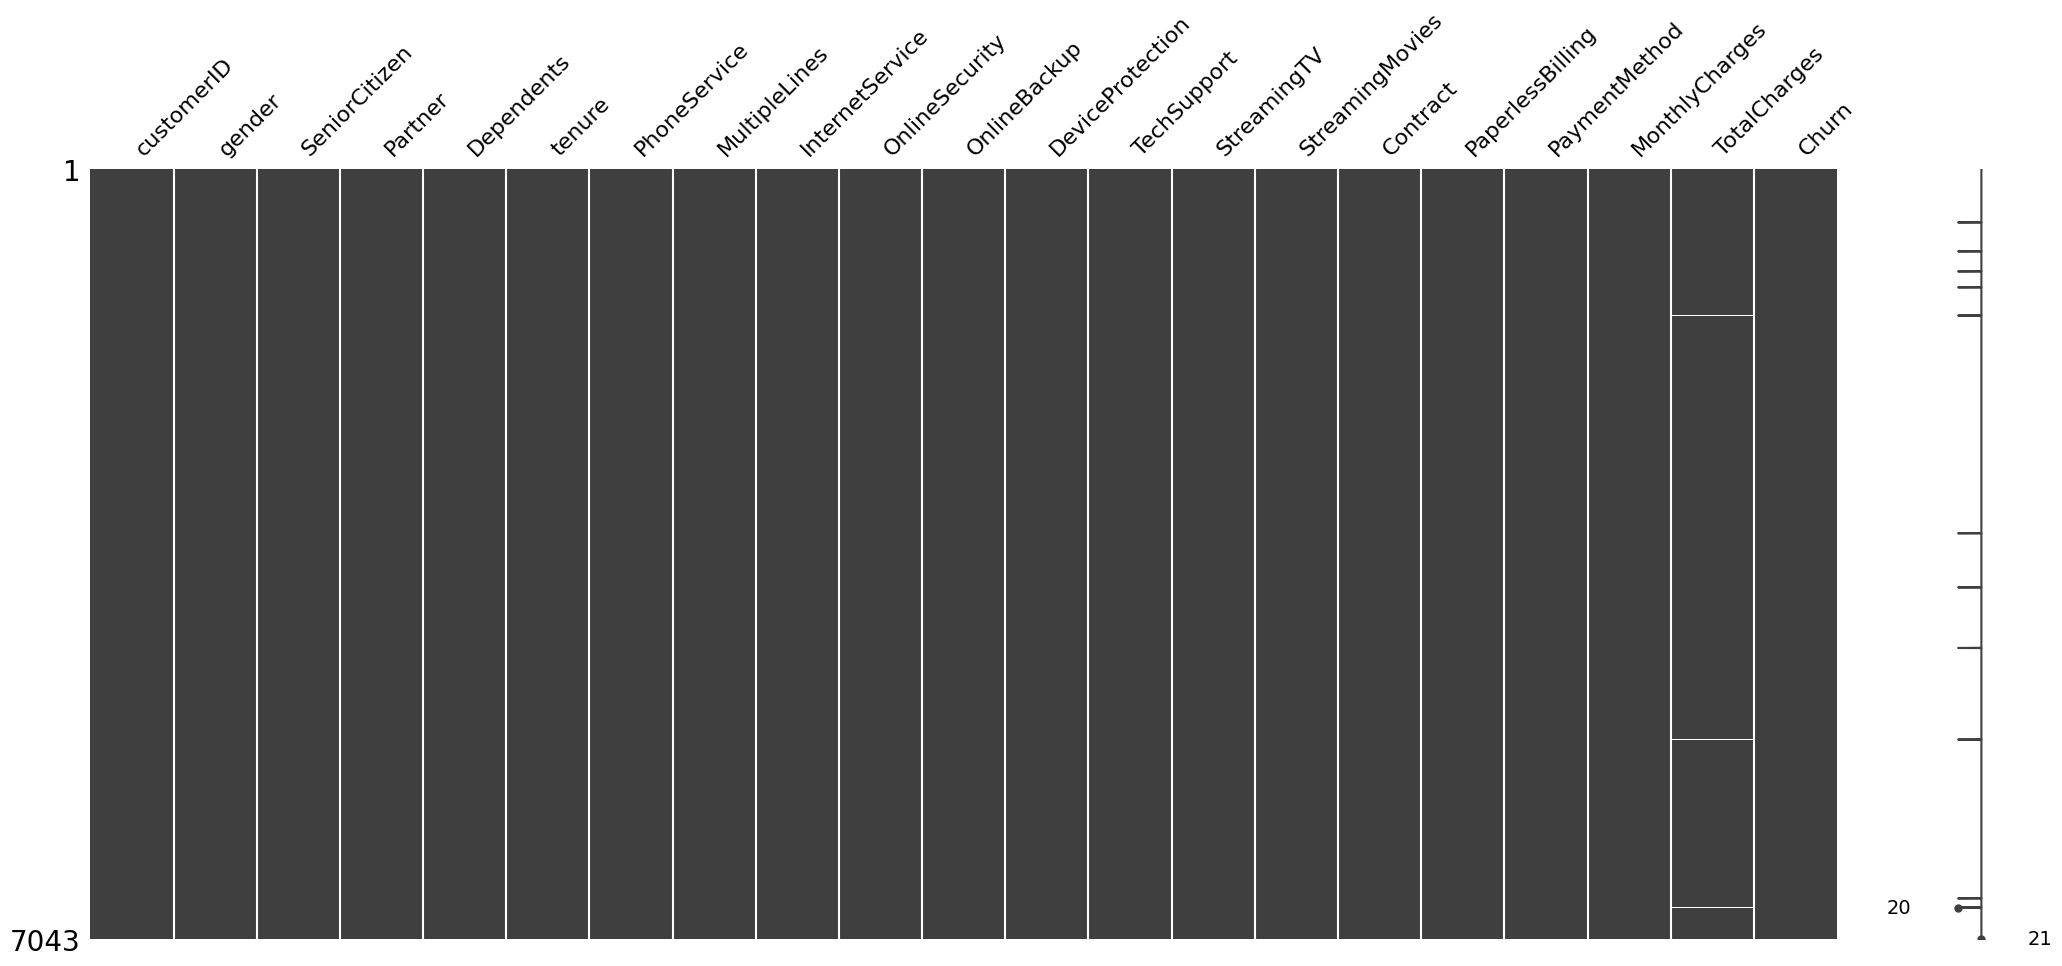

In [7]:
msno.matrix(data)

In [8]:
# Fill the empty values in the TotalCharges variable by multiplying the tenure and MonthlyCharges values
data['TotalCharges'].fillna(data['tenure'] * data['MonthlyCharges'], inplace=True)

In [9]:
# Check for cardinality control
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
# Let's review categorical and numerical values one last time

def filter_categorical_numeric_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    return categorical_columns, numeric_columns

# Filter categorical and numeric variables
categorical_cols, numeric_cols = filter_categorical_numeric_columns(data)

print("Categorics:")
print(categorical_cols)
print("\nNumerics:")
print(numeric_cols)

Categorics:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Numerics:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [11]:
# Let's see the unique values of the categorical features.

for feature in data[categorical_cols]:
        print(f'{feature}: {data[feature].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In several columns from the above dataset there is repetition for instance, 'No' and 'No internet service' means one and the same thing and this needs to be addressed for better model functions.

In [12]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service','No')

columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns_to_replace:
    data[column] = data[column].replace('No internet service', 'No')

In [13]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

churn_counts= data['Churn'].value_counts()
fig2 = px.pie(names= churn_counts.keys(), values= churn_counts.values, title='Churn Distribution')
fig2.show()

26.5% of the customers churned. 
Dataset is imbalanced.

In [14]:
'''This function gives the distribution of variables, 
their relationship with the target variable and the probability of churn on a variable basis.'''

def analyze_category(data, category_column, target_column='Churn'):
    # Value Counts Pie Chart
    category_counts = data[category_column].value_counts()
    fig = px.pie(names=category_counts.index, values=category_counts.values, title=f'{category_column} Distribution')
    fig.show()

    # Churn Probabilities
    churn_probabilities = data.groupby(category_column)[target_column].value_counts(normalize=True) * 100
    for category_value in data[category_column].unique():
        churn_rate = churn_probabilities[category_value]['Yes'] if 'Yes' in churn_probabilities[category_value].index else 0
        print(f"A {category_value} customer has a probability of {churn_rate:.2f}% churn")

    # Histogram
    fig = px.histogram(data, x=category_column, color=target_column, width=400, height=400)
    fig.show()

    # Grouping
    grouped_data = data.groupby([category_column, target_column]).size().reset_index(name='count')

    # Bar Chart
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, x=category_column, y='count', hue=target_column)
    plt.title(f'Number of people with or without churn by {category_column} type')
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.show()

In [15]:
data["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

A Female customer has a probability of 26.92% churn
A Male customer has a probability of 26.16% churn


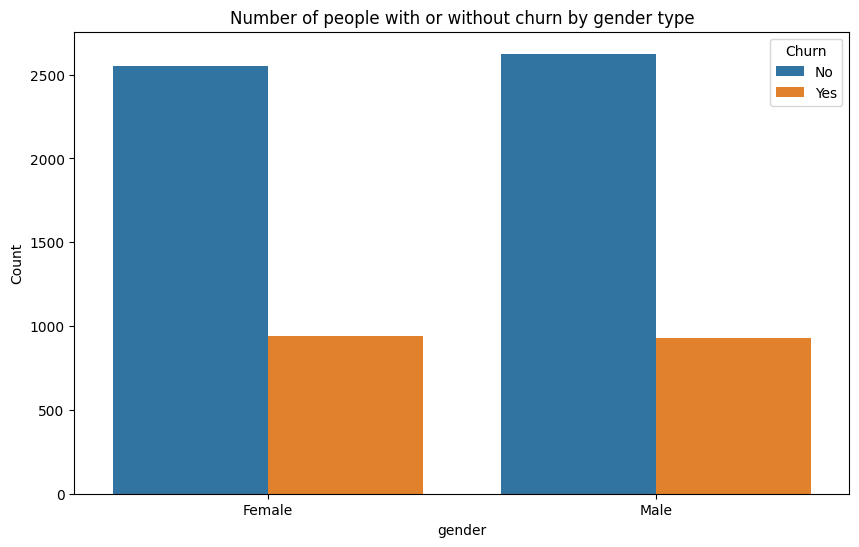

In [16]:
analyze_category(data, 'gender')

In [17]:
data["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

A Yes customer has a probability of 19.66% churn
A No customer has a probability of 32.96% churn


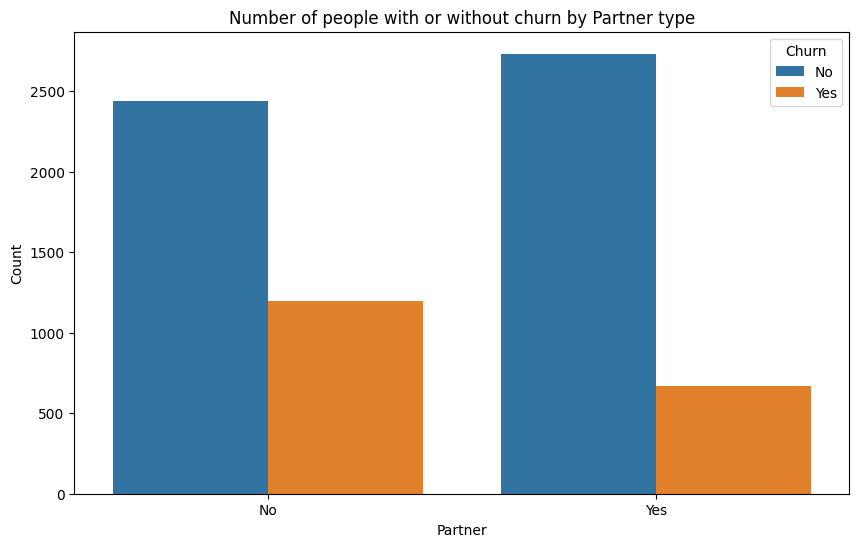

In [18]:
analyze_category(data, 'Partner')

In [19]:
data["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

A No customer has a probability of 31.28% churn
A Yes customer has a probability of 15.45% churn


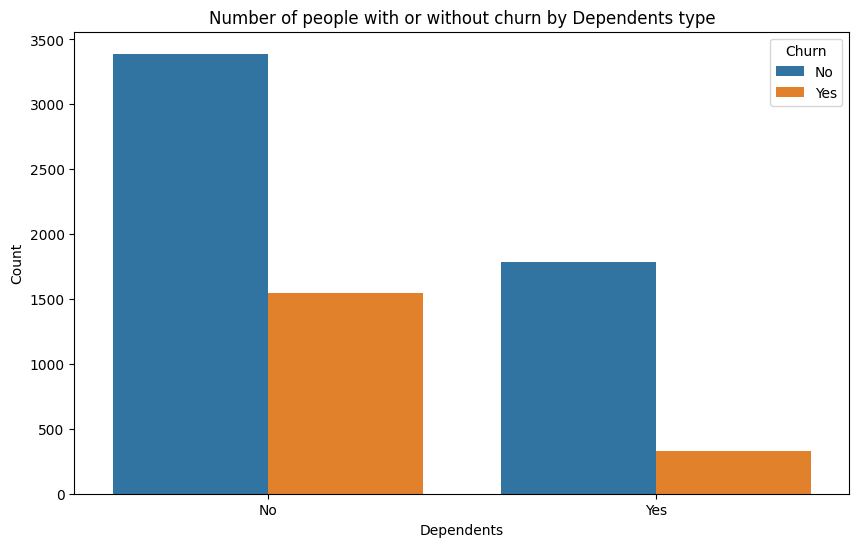

In [20]:
analyze_category(data,'Dependents')

In [21]:
data["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

A No customer has a probability of 24.93% churn
A Yes customer has a probability of 26.71% churn


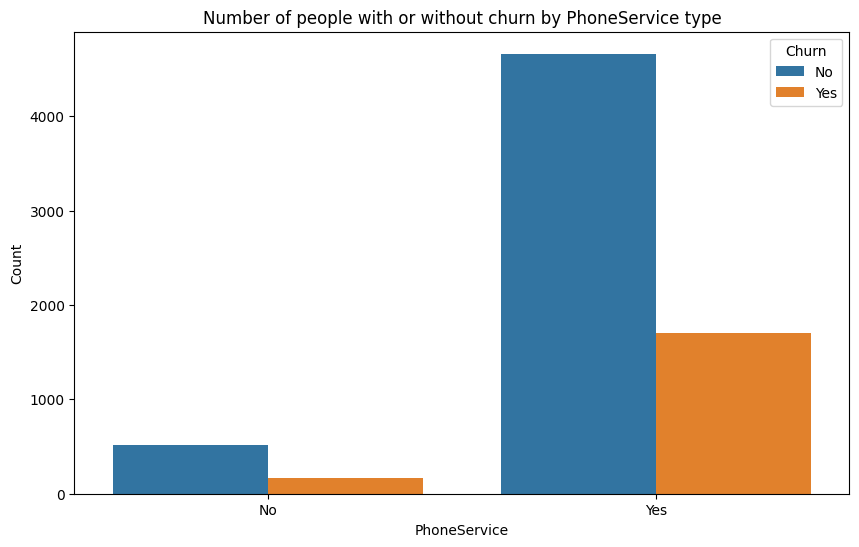

In [22]:
analyze_category(data,'PhoneService')

In [23]:
data["MultipleLines"].value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

A No customer has a probability of 25.02% churn
A Yes customer has a probability of 28.61% churn


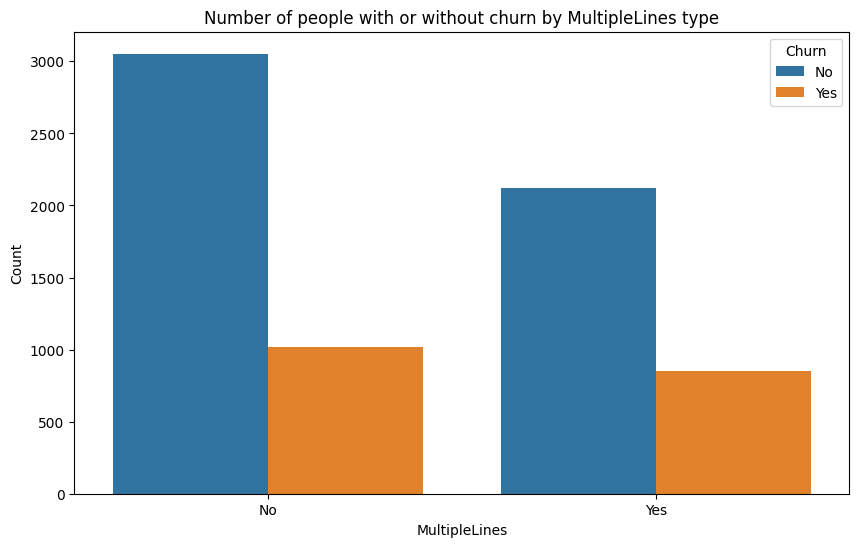

In [24]:
analyze_category(data, 'MultipleLines')

In [25]:
data["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

A DSL customer has a probability of 18.96% churn
A Fiber optic customer has a probability of 41.89% churn
A No customer has a probability of 7.40% churn


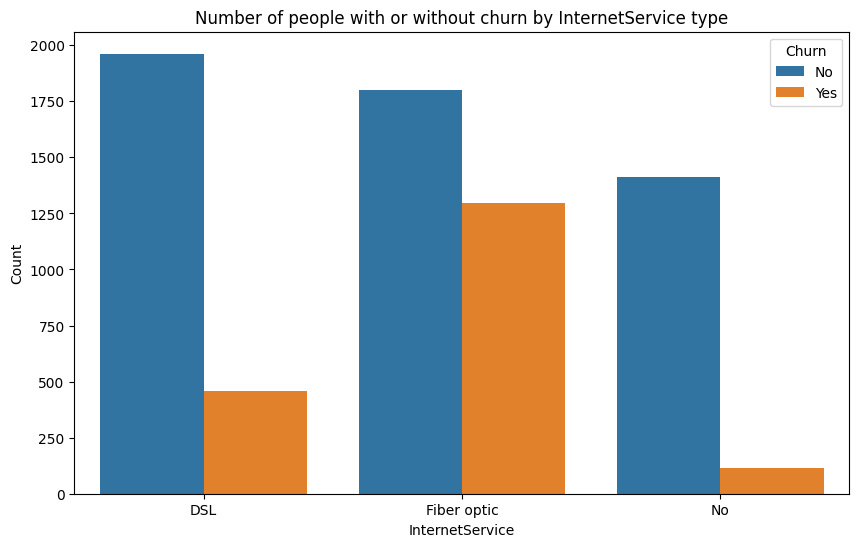

In [26]:
analyze_category(data, 'InternetService')

In [27]:
data["OnlineSecurity"].value_counts()

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

A No customer has a probability of 31.33% churn
A Yes customer has a probability of 14.61% churn


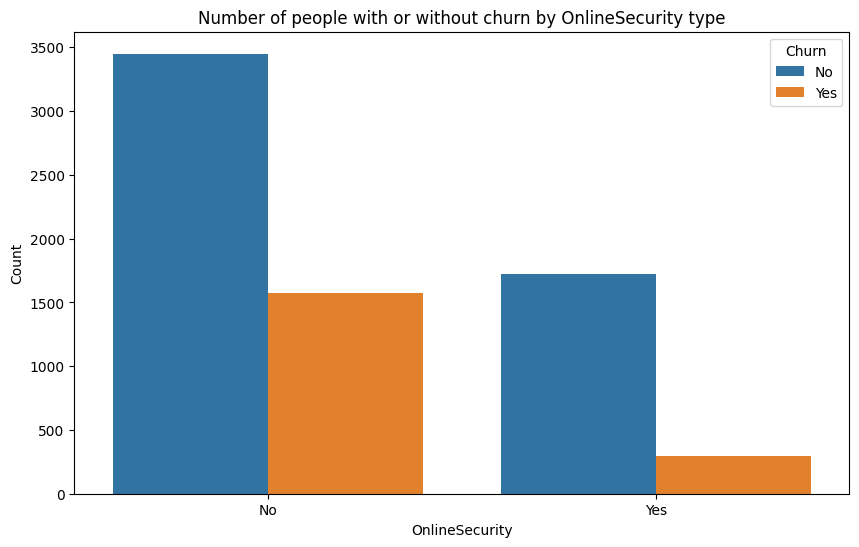

In [28]:
analyze_category(data, 'OnlineSecurity')

In [29]:
data["OnlineBackup"].value_counts()

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

A Yes customer has a probability of 21.53% churn
A No customer has a probability of 29.17% churn


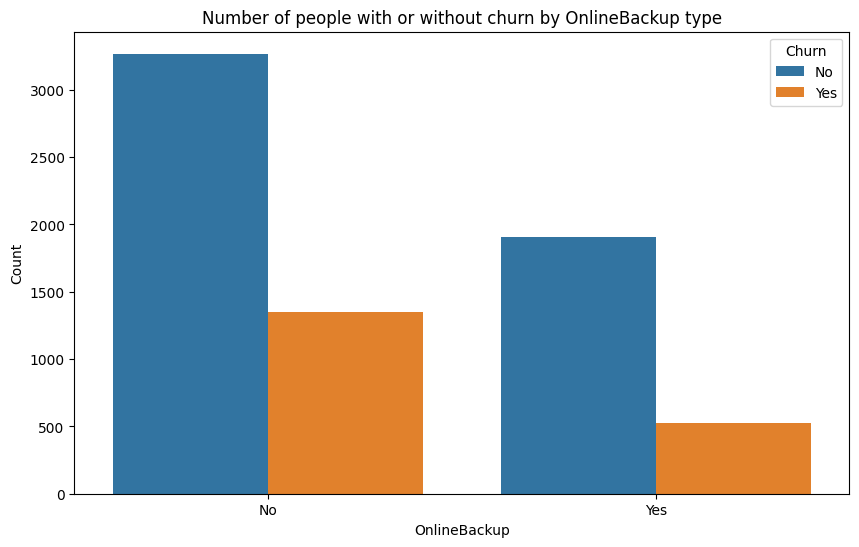

In [30]:
analyze_category(data, 'OnlineBackup')

In [31]:
data["DeviceProtection"].value_counts()

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

A No customer has a probability of 28.65% churn
A Yes customer has a probability of 22.50% churn


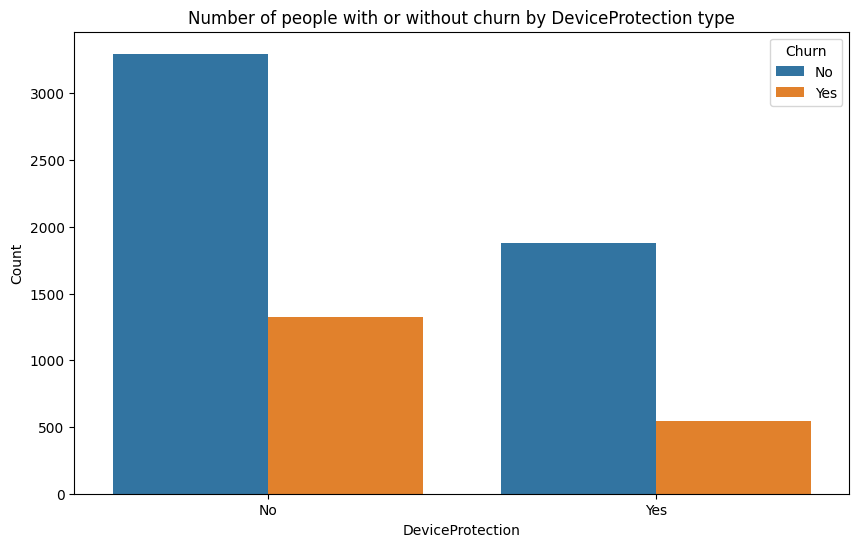

In [32]:
analyze_category(data, 'DeviceProtection')

In [33]:
data["TechSupport"].value_counts()

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

A No customer has a probability of 31.19% churn
A Yes customer has a probability of 15.17% churn


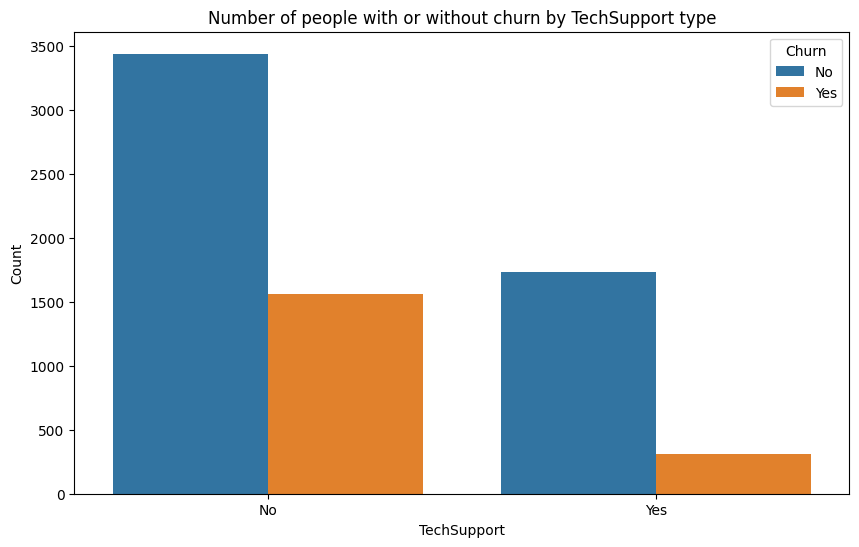

In [34]:
analyze_category(data, 'TechSupport')

In [35]:
data["StreamingTV"].value_counts()

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

A No customer has a probability of 24.33% churn
A Yes customer has a probability of 30.07% churn


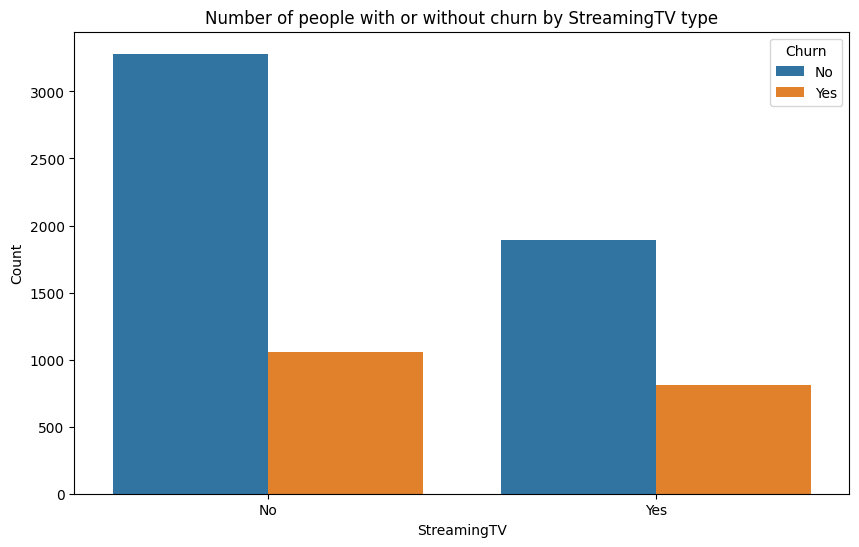

In [36]:
analyze_category(data, 'StreamingTV')

In [37]:
data["StreamingMovies"].value_counts()

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

A No customer has a probability of 24.38% churn
A Yes customer has a probability of 29.94% churn


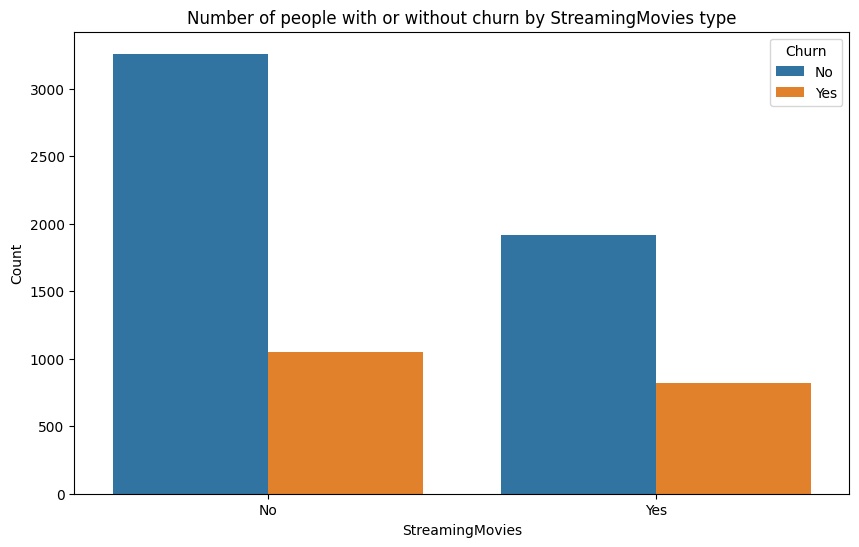

In [38]:
analyze_category(data, 'StreamingMovies')

In [39]:
data["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

A Month-to-month customer has a probability of 42.71% churn
A One year customer has a probability of 11.27% churn
A Two year customer has a probability of 2.83% churn


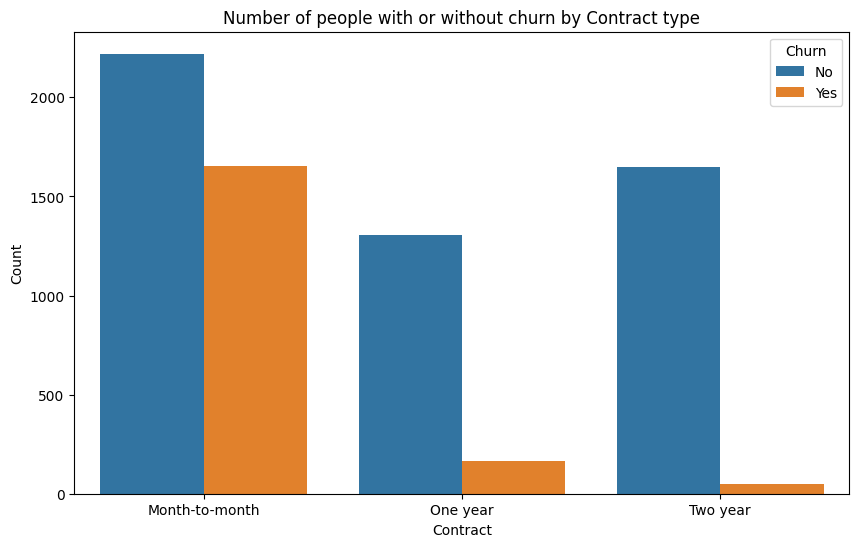

In [40]:
analyze_category(data, 'Contract')

A Yes customer has a probability of 33.57% churn
A No customer has a probability of 16.33% churn


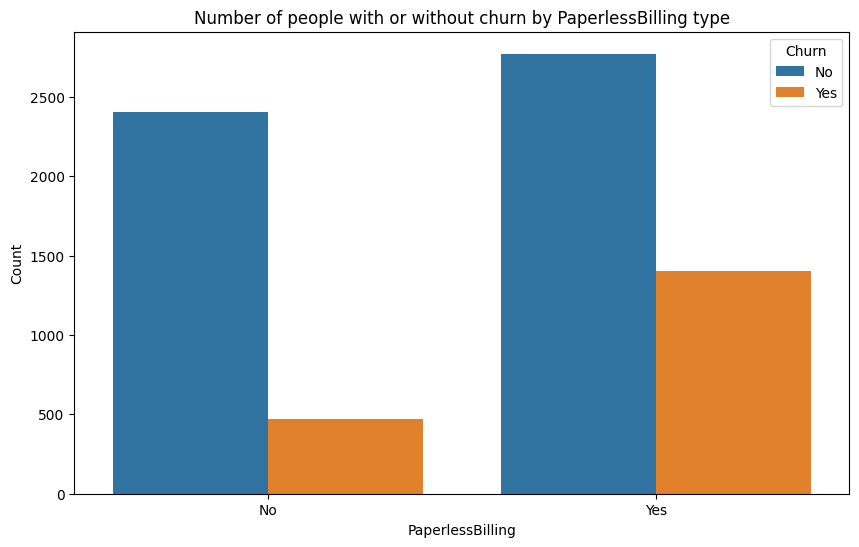

In [41]:
analyze_category(data, 'PaperlessBilling')

A Electronic check customer has a probability of 45.29% churn
A Mailed check customer has a probability of 19.11% churn
A Bank transfer (automatic) customer has a probability of 16.71% churn
A Credit card (automatic) customer has a probability of 15.24% churn


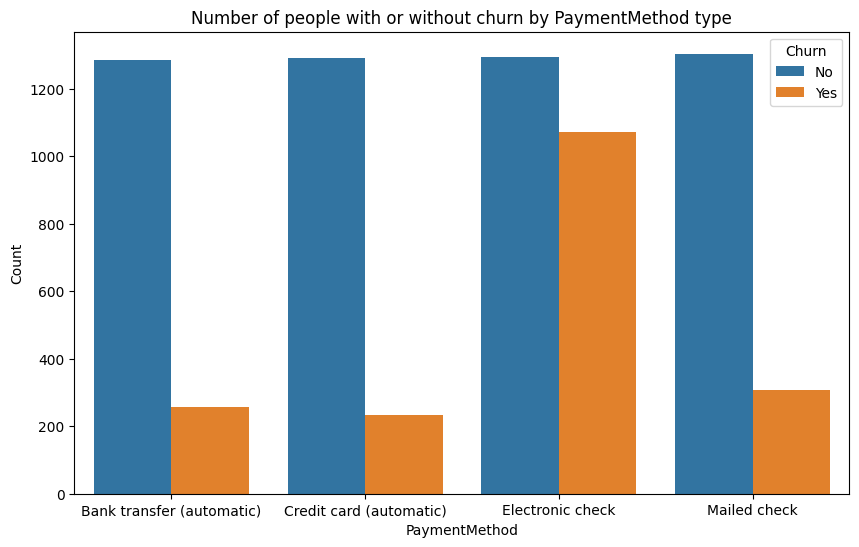

In [42]:
analyze_category(data, 'PaymentMethod')

In [43]:
# Changing categorical variables to numeric:
data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})

In [44]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier, plot_importance


In [45]:
# Create the StratifiedShuffleSplit object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=64)

train_index, test_index = next(strat_split.split(data, data["Churn"]))

# Create train and test sets
strat_train_set = data.loc[train_index]
strat_test_set = data.loc[test_index]

# Proportion of the target variable in the original data set
print('Target Labels Ratio in Original Dataset\n')
print(data["Churn"].value_counts(normalize=True).sort_index())

# Proportion of the target variable in the test set
print('\nTarget Labels Ratio in Test Dataset\n')
print(strat_test_set["Churn"].value_counts(normalize=True).sort_index())

X_train = strat_train_set.drop("Churn", axis=1)
y_train = strat_train_set["Churn"].copy()

X_test = strat_test_set.drop("Churn", axis=1)
y_test = strat_test_set["Churn"].copy()

Target Labels Ratio in Original Dataset

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Target Labels Ratio in Test Dataset

Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [46]:
import joblib

# Save the datasets
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [47]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

cat_model = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=3)

cat_model.fit(X_train, y_train, cat_features=categorical_columns, eval_set=(X_test, y_test))

y_pred = cat_model.predict(X_test)

accuracy, recall, roc_auc, precision = [round(metric(y_test, y_pred), 4) for metric in [accuracy_score, recall_score, roc_auc_score, precision_score]]

model_names = ['CatBoost_Model']

result = pd.DataFrame({'Accuracy':accuracy,
                       'Recall':recall, 
                       'Roc_Auc':roc_auc, 
                       'Precision':precision}, index=model_names)

result

Accuracy  Recall  Roc_Auc  Precision
CatBoost_Model    0.7807  0.8316   0.7969     0.5583

In [48]:
cat_model.save_model('cat_model.cbm')

In [49]:
pool = Pool(X_train, y_train, cat_features=categorical_columns)

feature_importance = pd.DataFrame({'feature_importance': cat_model.get_feature_importance(pool), 
                      'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

feature_importance

feature_importance     feature_names
15           19.620905          Contract
5            18.503359            tenure
8            17.873583   InternetService
19            9.485946      TotalCharges
17            6.555092     PaymentMethod
18            4.956261    MonthlyCharges
13            3.142015       StreamingTV
7             2.970217     MultipleLines
16            2.950994  PaperlessBilling
14            2.852321   StreamingMovies
9             2.505590    OnlineSecurity
2             2.291312     SeniorCitizen
12            2.059964       TechSupport
1             1.604079            gender
6             1.472954      PhoneService
3             0.587744           Partner
11            0.258099  DeviceProtection
10            0.204897      OnlineBackup
4             0.104668        Dependents
0             0.000000        customerID

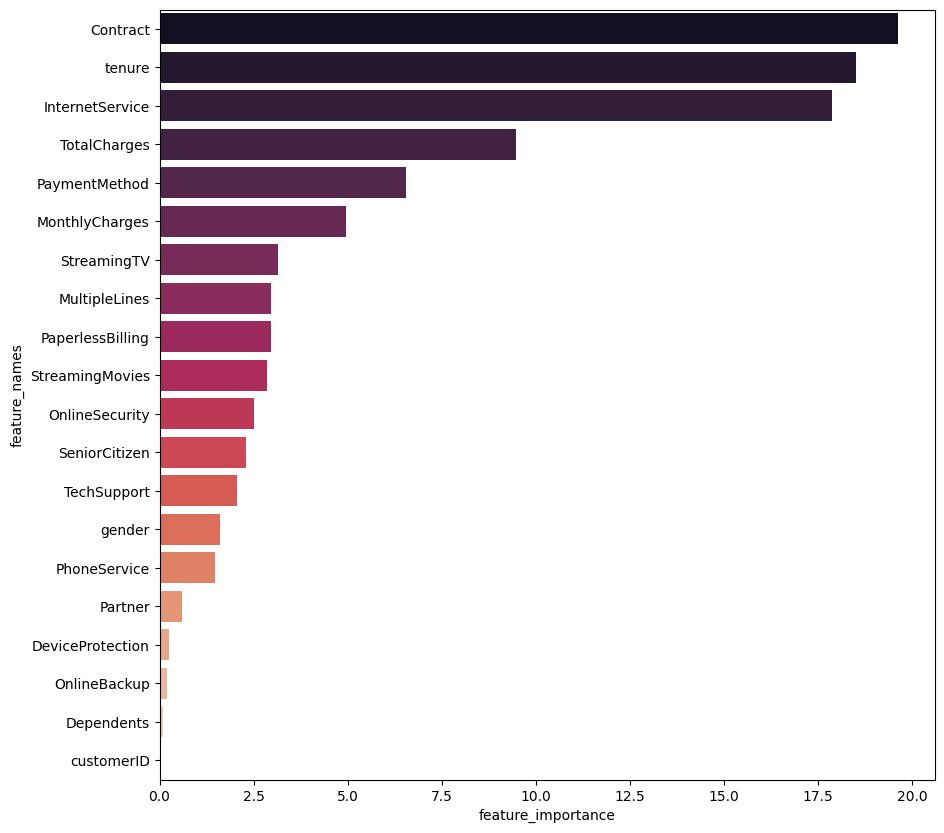

In [50]:
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature_names'], palette = 'rocket')
plt.show()

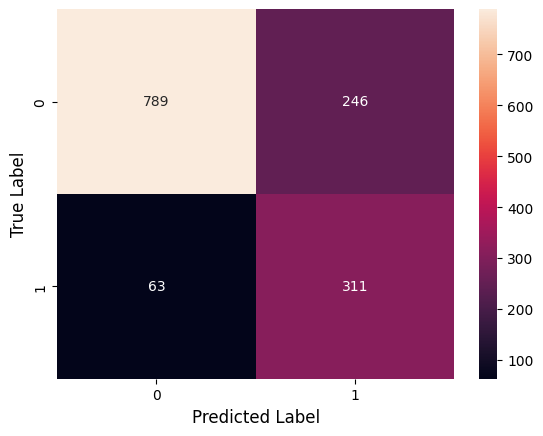

In [51]:
cat_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [52]:
print(metrics.classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1035
           1       0.56      0.83      0.67       374

    accuracy                           0.78      1409
   macro avg       0.74      0.80      0.75      1409
weighted avg       0.83      0.78      0.79      1409



In [53]:
import shap

explainercat = shap.TreeExplainer(cat_model)
shap_values_cat_train = explainercat.shap_values(X_train)
shap_values_cat_test = explainercat.shap_values(X_test)

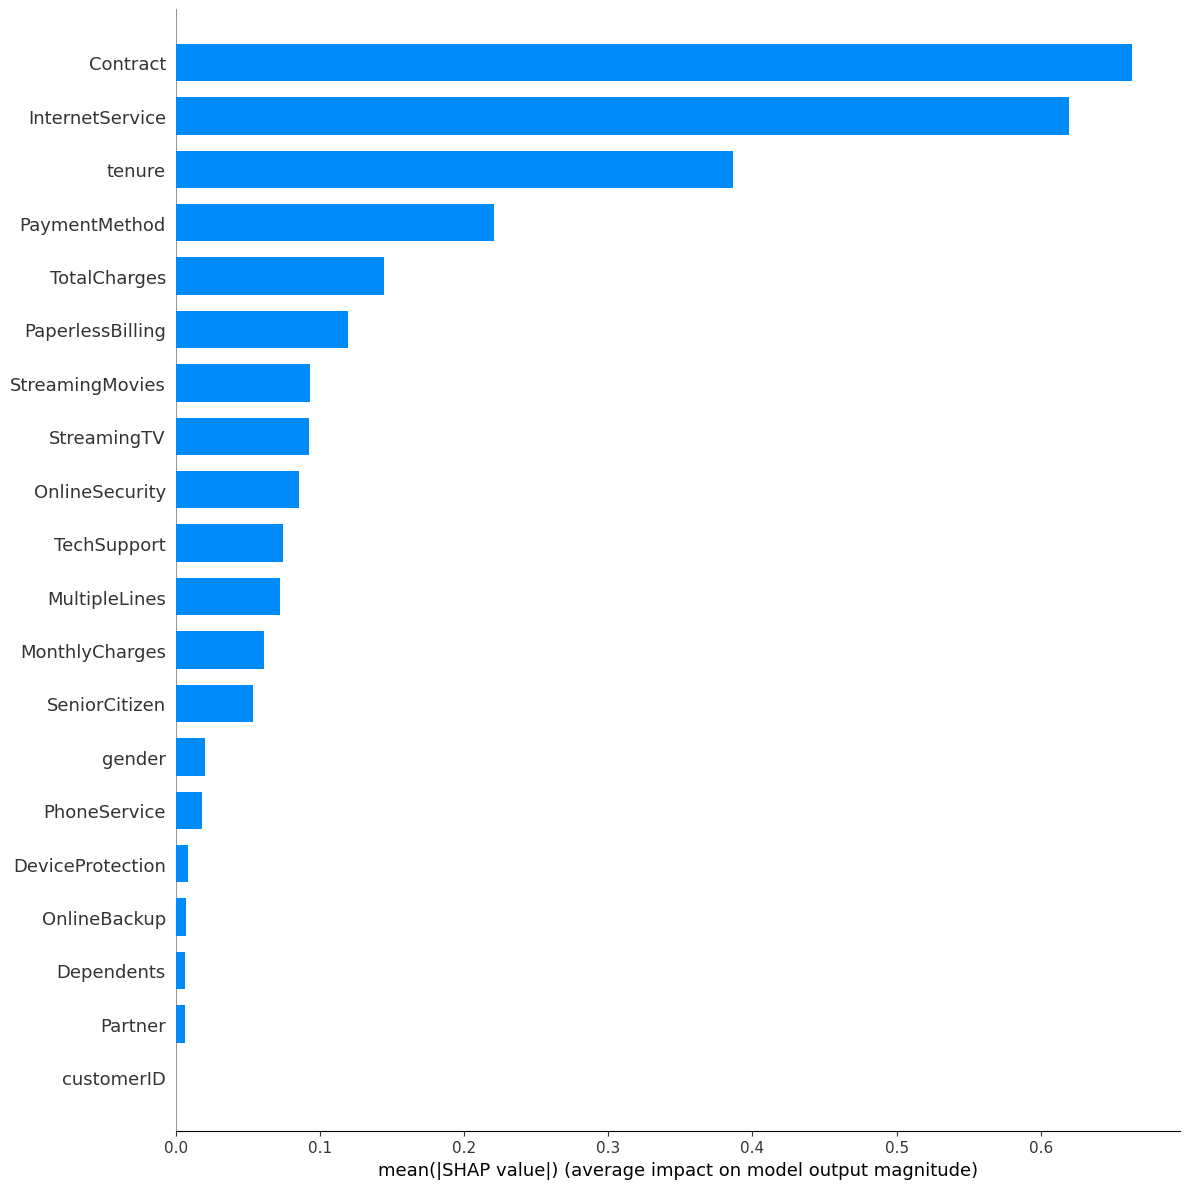

In [54]:
shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar",plot_size=(12,12))

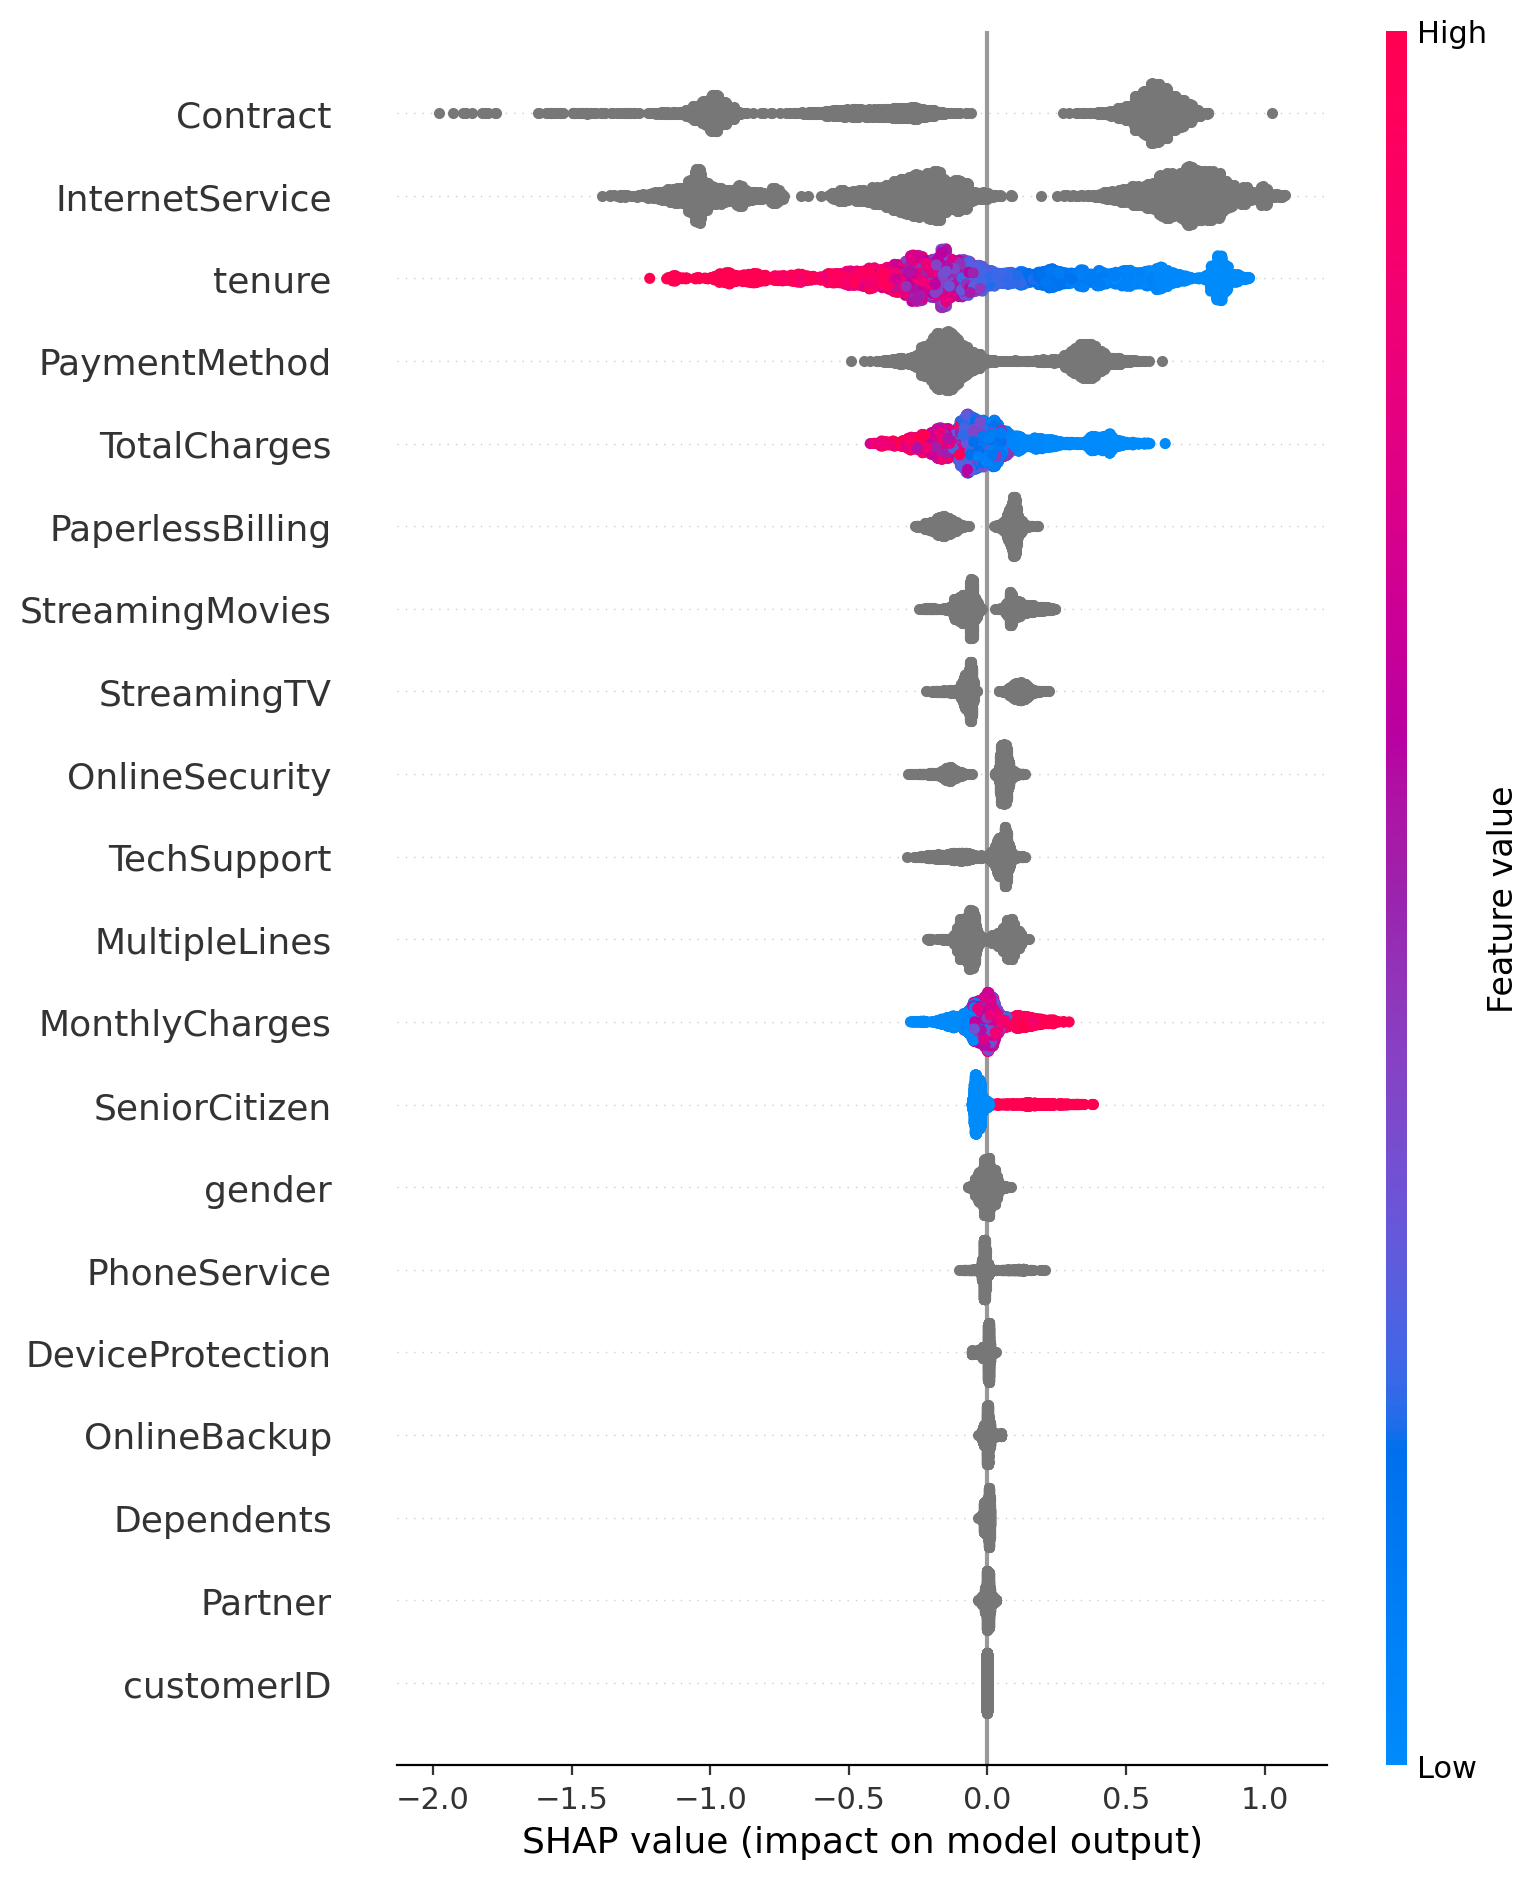

In [55]:
# summarize the effects of all the features

fig = plt.subplots(figsize=(6,6),dpi=200)

ax = shap.summary_plot(shap_values_cat_train, X_train,plot_type="dot")

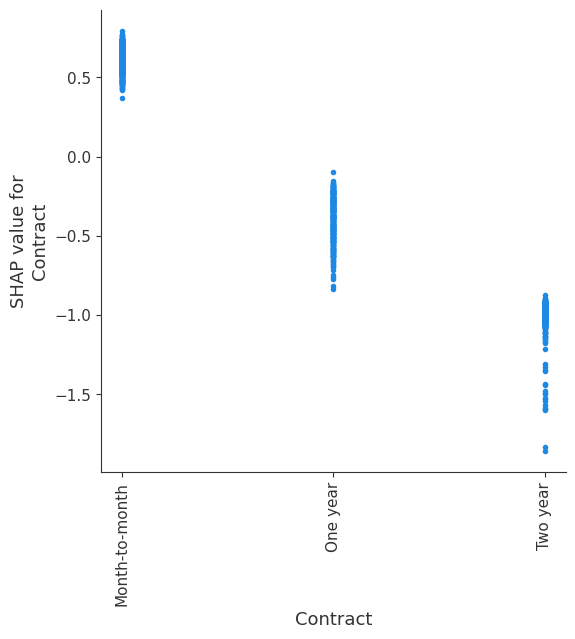

In [56]:
# Contract

fig, ax= plt.subplots(figsize=(6,6),dpi=100)
shp_plt = shap.dependence_plot("Contract", shap_values_cat_test, X_test,ax=ax,interaction_index=None)

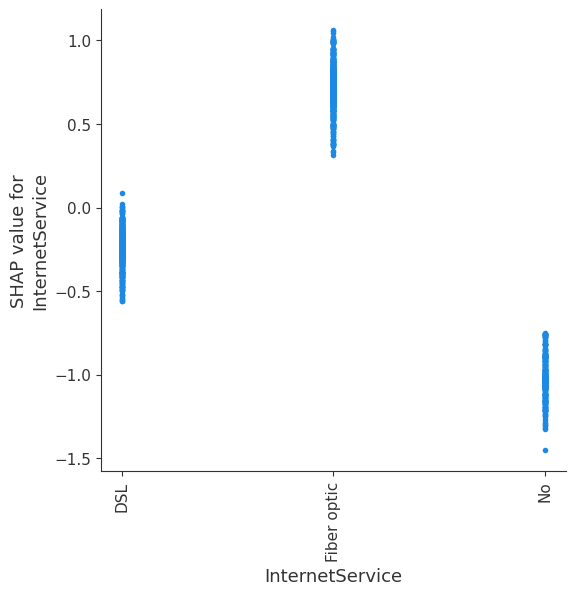

In [57]:
# Internet Service

fig, ax= plt.subplots(figsize=(6,6),dpi=100)

shap.dependence_plot("InternetService", shap_values_cat_test, X_test,ax=ax, interaction_index=None)

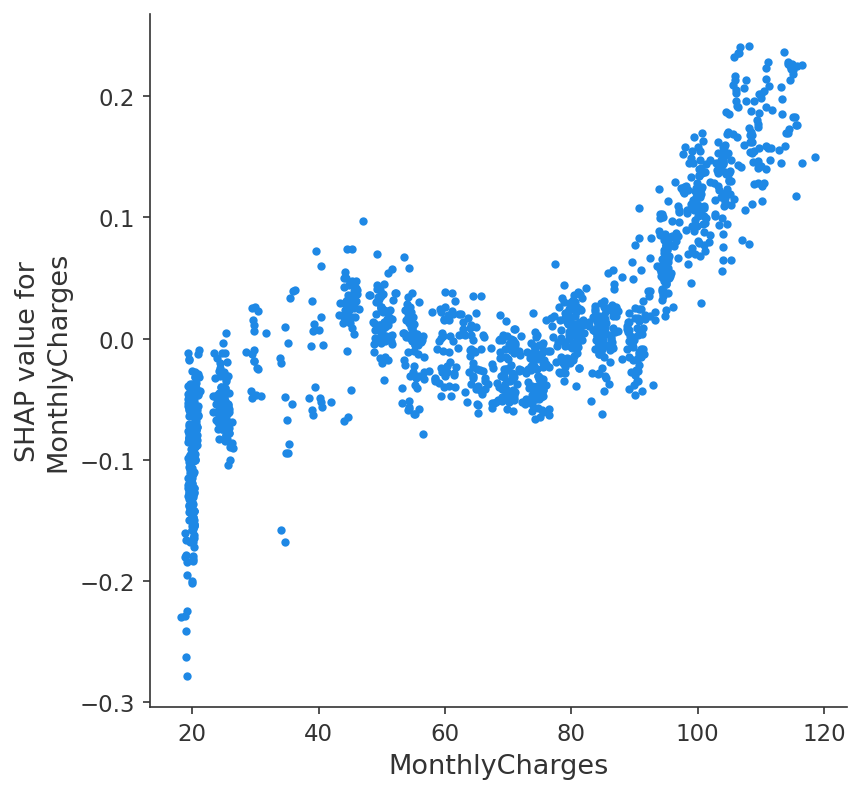

In [58]:
# MonthlyCharges

fig, ax1= plt.subplots(figsize=(6,6),dpi=150)

shp_plt = shap.dependence_plot("MonthlyCharges", shap_values_cat_test,X_test,ax=ax1, interaction_index=None)

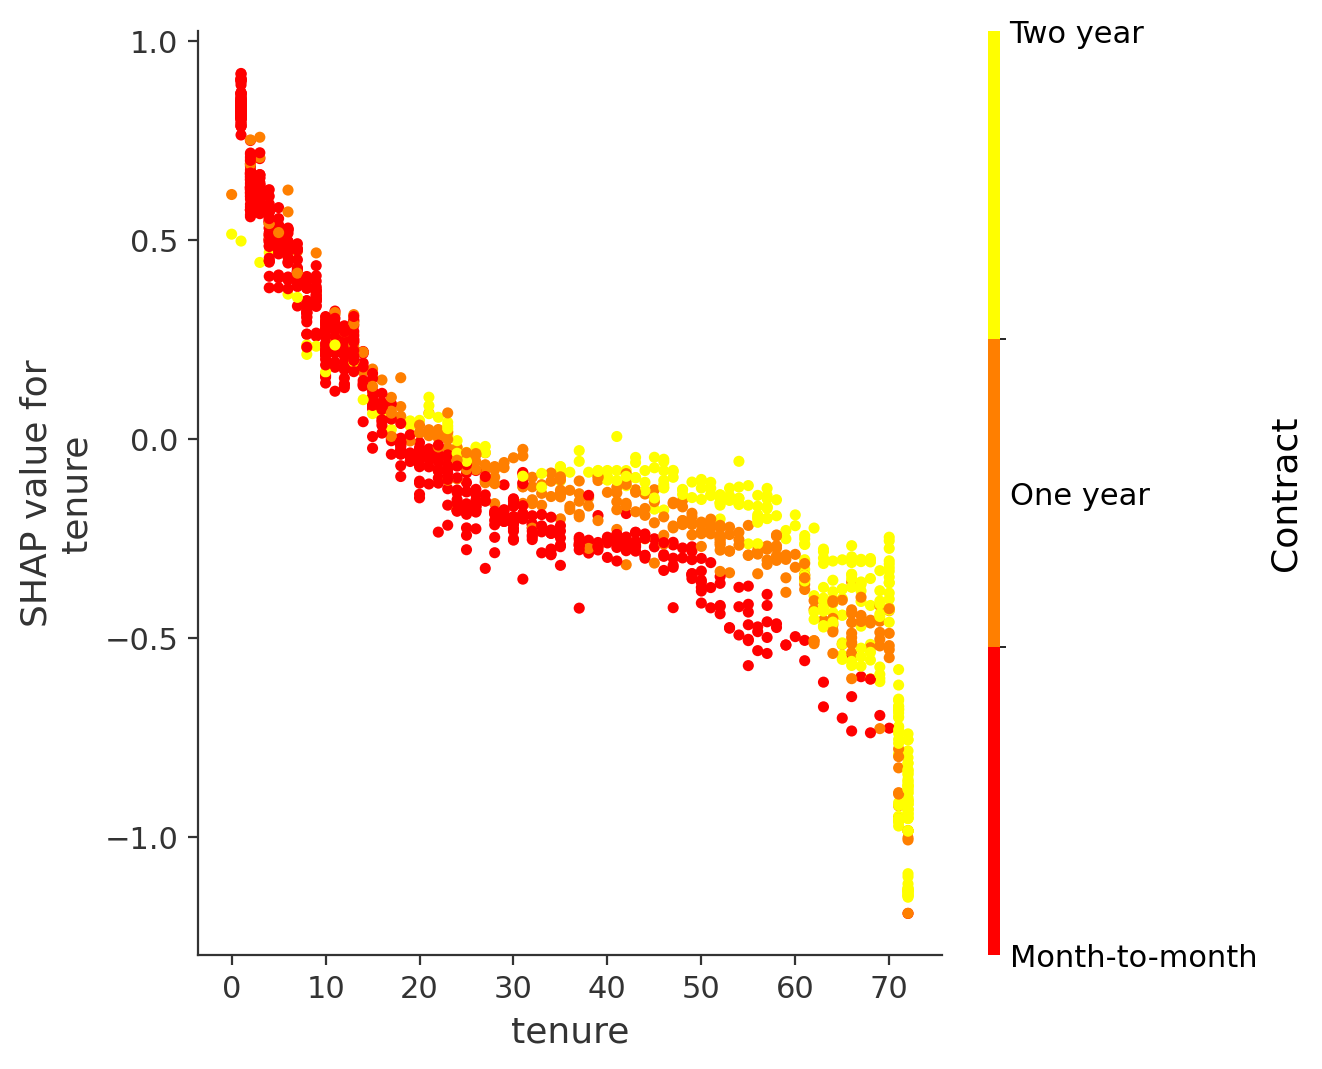

In [59]:
# Tenure - Contract Churn

fig, ax3 = plt.subplots(figsize=(6,6),dpi=200)
shp_plt = shap.dependence_plot("tenure", shap_values_cat_test, X_test, interaction_index="Contract", ax=ax3, cmap=plt.get_cmap('autumn'))

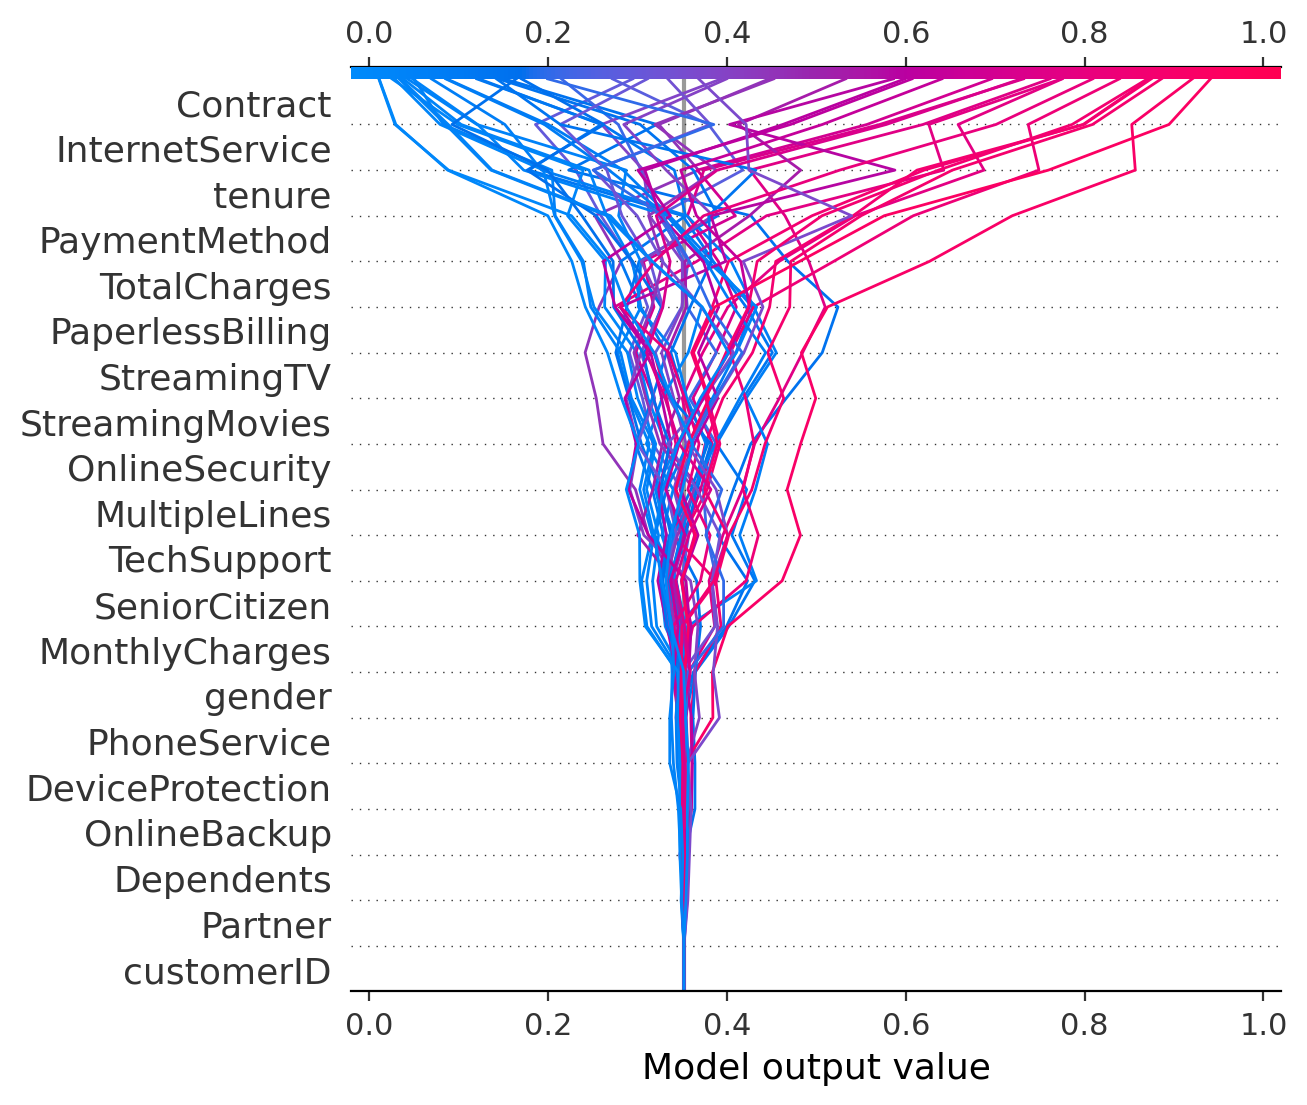

In [60]:
fig = plt.subplots(figsize=(6,6),dpi=200)
ax_1= shap.decision_plot(explainercat.expected_value, shap_values_cat_test[:50], X_test.iloc[:50],auto_size_plot=False, link= "logit")

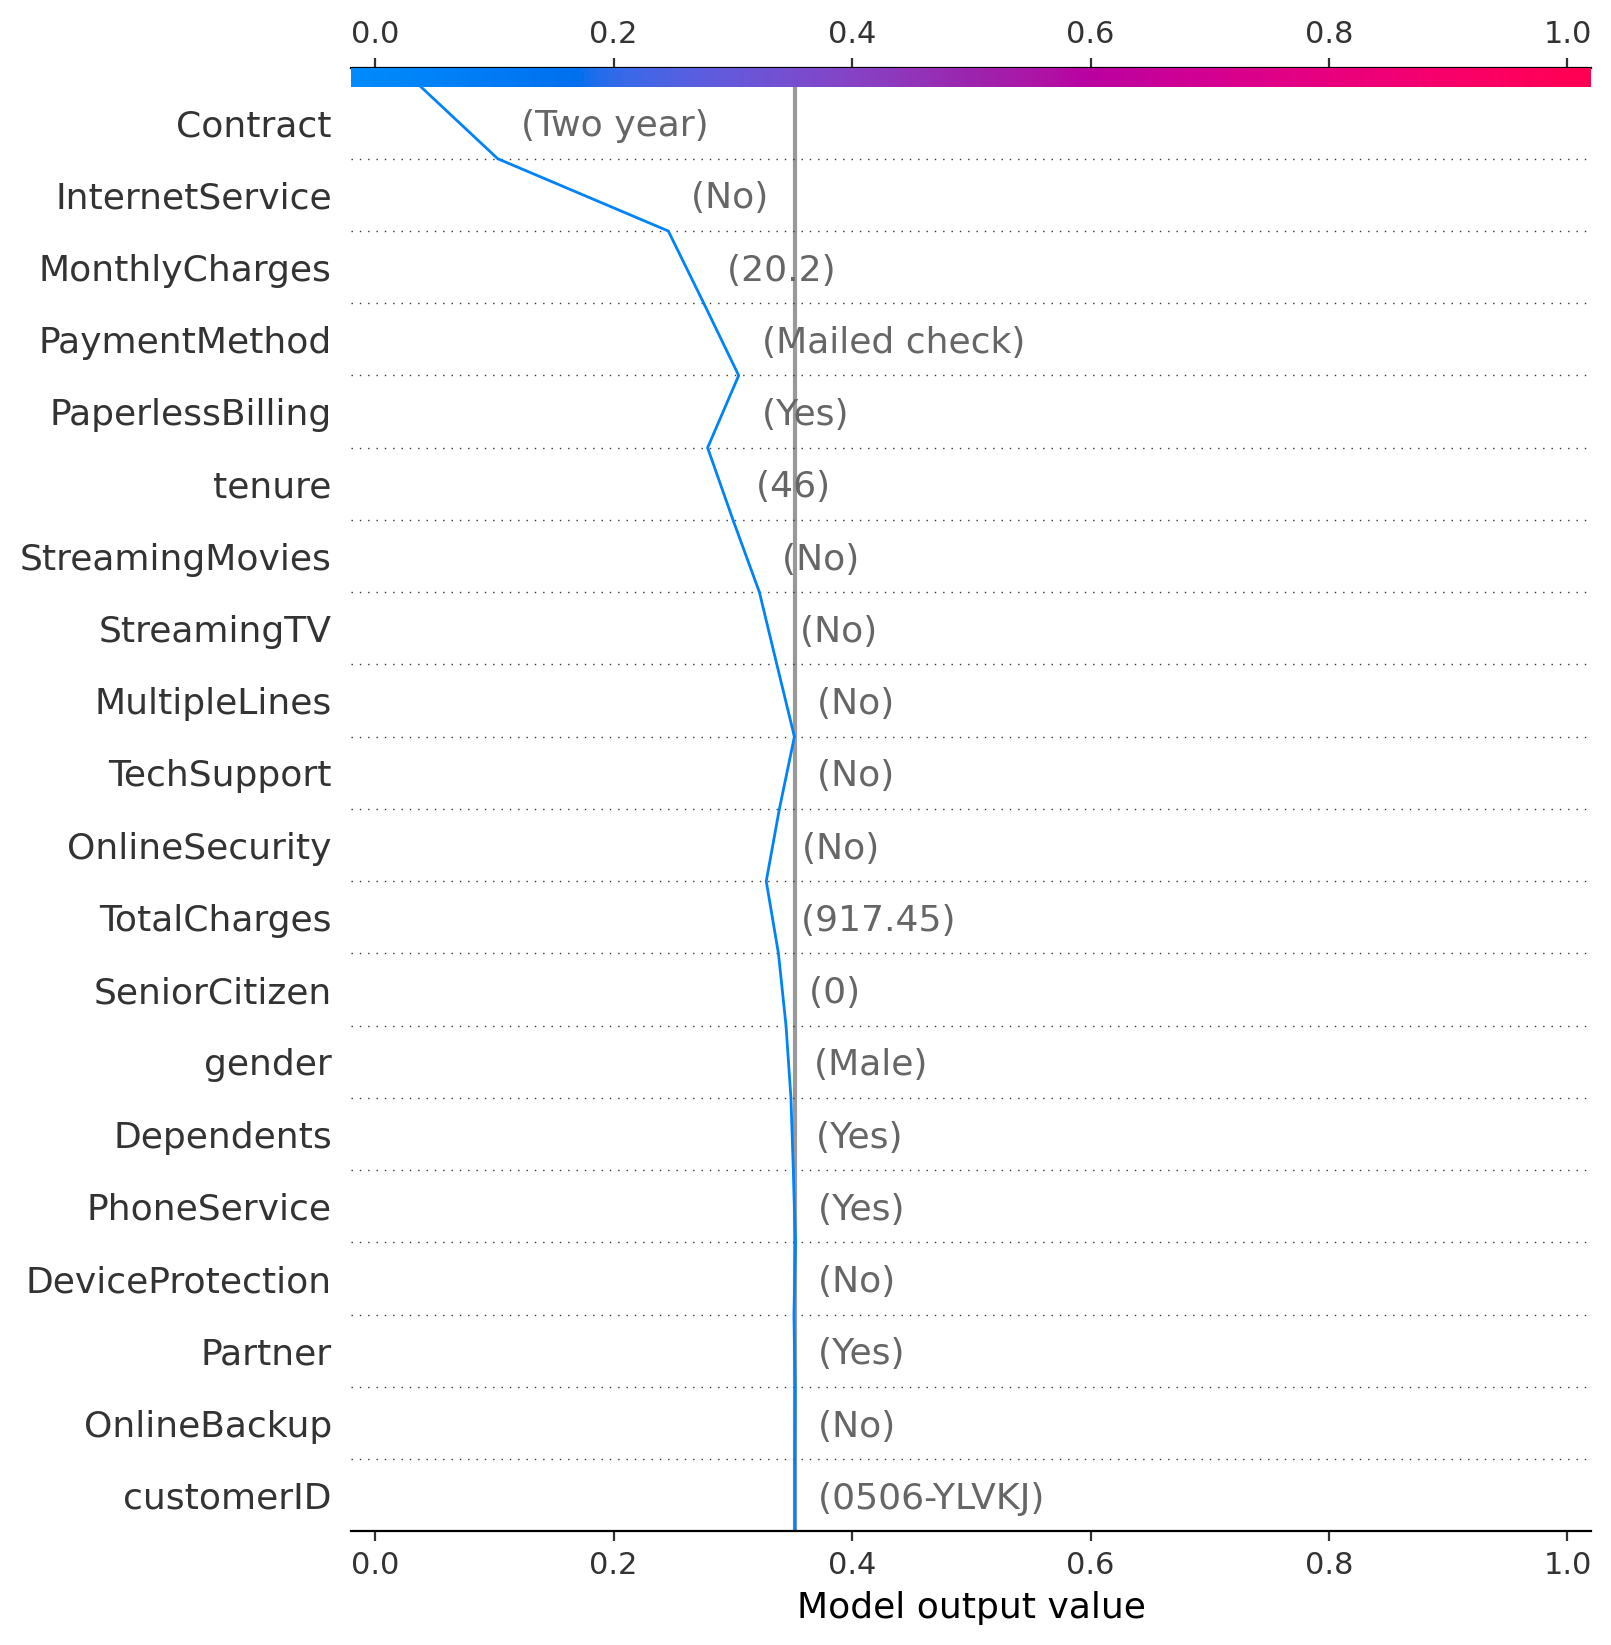

In [61]:
# Tested on customer 13

fig = plt.subplots(figsize=(6,6),dpi=200)
ax_2= shap.decision_plot(explainercat.expected_value, shap_values_cat_test[13], X_test.iloc[[13]], link= "logit")

In [62]:
# Let's see our model prediction on the customer 15:

print(f'Customer 13: Actual value for the Customer Churn : {y_test.iloc[13]}')
print(f"Customer 13: CatBoost Model's prediction for the Customer Churn : {y_pred[13]}")

Customer 13: Actual value for the Customer Churn : 0
Customer 13: CatBoost Model's prediction for the Customer Churn : 0


In [63]:
shap_values_cat_test[64]

array([ 0.        ,  0.01076859, -0.02746016,  0.00654042,  0.00380351,
        0.53841876, -0.01198798,  0.10258182,  0.91107441,  0.05829119,
        0.00874456, -0.00259599,  0.05810417,  0.09240061,  0.09580397,
        0.56834804,  0.0947824 ,  0.33297237,  0.14050756,  0.05567693])

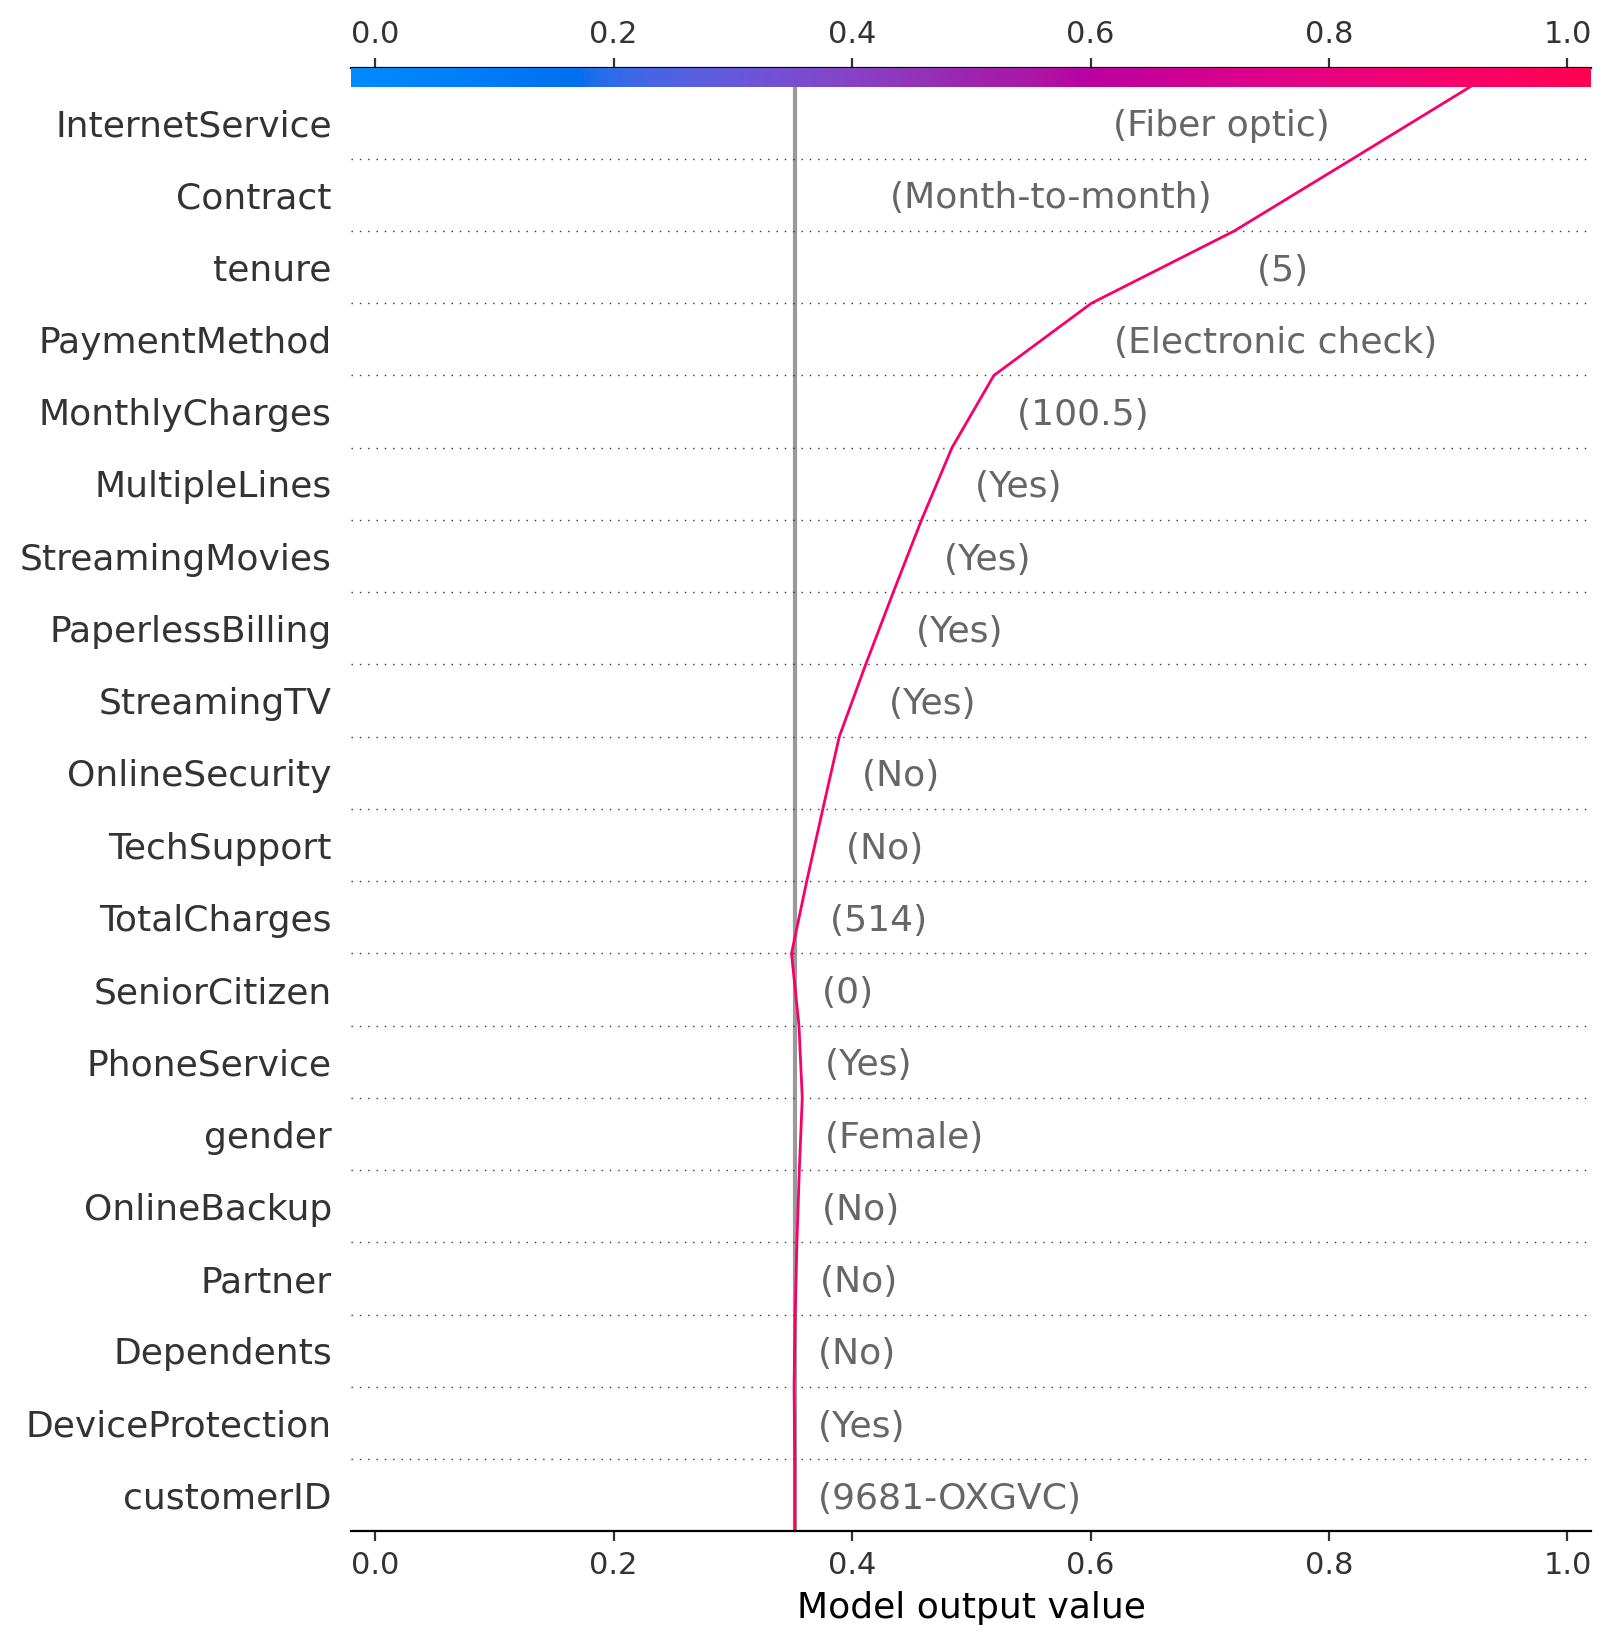

In [64]:
# Tested on customer number 64
fig = plt.subplots(figsize=(6,6),dpi=200)
ax_2= shap.decision_plot(explainercat.expected_value, shap_values_cat_test[64], X_test.iloc[[64]], link= "logit")

In [65]:
print(f'Customer 64: Actual value for the Customer Churn : {y_test.iloc[64]}')
print(f"Customer 64: CatBoost Model's prediction for the Customer Churn : {y_pred[64]}")

Customer 64: Actual value for the Customer Churn : 1
Customer 64: CatBoost Model's prediction for the Customer Churn : 1


In [66]:
# Save the edited data
data.to_parquet('data_regulated.parquet')